In [2]:
import os.path
import random
import sys
import numpy as np
from stats import mean, de_mean, standard_deviation, correlation
from gradient_descent import minimize_stochastic
import matplotlib.pyplot as plt

In [3]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

def in_random_order(data):
#"""generator	that	returns	the	elements	of	data	in	random	order"""
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    
    # initial guess
    theta = theta_0
    
    # initial step size
    alpha = alpha_0
    
    # the minimum so far
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [4]:
data = np.loadtxt("ex1data2.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [5]:
# Break datasets into X and Y.
X_0 = np.array(data[::,0:2])
X_1 = np.array(data[::,0])
X_2 = np.array(data[::,1])
Y = data[::,-1:]
X_10 = np.sort(X_1)
X_10 = X_10[::-1]
X_10 = X_10.tolist()
X_10


[4478.0,
 4215.0,
 3890.0,
 3137.0,
 3031.0,
 3000.0,
 2637.0,
 2609.0,
 2567.0,
 2526.0,
 2400.0,
 2300.0,
 2238.0,
 2200.0,
 2162.0,
 2132.0,
 2104.0,
 2040.0,
 2000.0,
 1985.0,
 1962.0,
 1940.0,
 1890.0,
 1888.0,
 1852.0,
 1839.0,
 1811.0,
 1767.0,
 1664.0,
 1604.0,
 1600.0,
 1534.0,
 1494.0,
 1458.0,
 1437.0,
 1427.0,
 1416.0,
 1380.0,
 1320.0,
 1268.0,
 1239.0,
 1236.0,
 1203.0,
 1200.0,
 1100.0,
 1000.0,
 852.0]

In [6]:
# Setup bias array
X_ones = np.ones(len(X_0))
# Concentate arrays
# X = [X_ones,X_0]
X1 = np.vstack((X_ones.T,X_0.T))
# X1 = [[X_ones],[X_0]]

# X1.T

In [7]:
Theta = np.linalg.pinv(X1.dot(X1.T)).dot(X1).dot(Y)
Theta

array([[89597.90954361],
       [  139.21067402],
       [-8738.01911255]])

In [8]:
# Feature Scaling
# Mean
mean_size = np.mean(X1[1])
mean_bedroom = np.mean(X1[2])
# Standard Deviation
std_size = np.std(X1[1])
std_bedroom = np.std(X1[2])
# Scaling
X1[1] = (X1[1] - mean_size)/std_size
X1[2] = (X1[2] - mean_bedroom)/std_bedroom
X11 = X1
X11[1]

array([ 1.31415422e-01, -5.09640698e-01,  5.07908699e-01, -7.43677059e-01,
        1.27107075e+00, -1.99450507e-02, -5.93588523e-01, -7.29685755e-01,
       -7.89466782e-01, -6.44465993e-01, -7.71822042e-02, -8.65999486e-04,
       -1.40779041e-01,  3.15099326e+00, -9.31923697e-01,  3.80715024e-01,
       -8.65782986e-01, -9.72625673e-01,  7.73743478e-01,  1.31050078e+00,
       -2.97227261e-01, -1.43322915e-01, -5.04552951e-01, -4.91995958e-02,
        2.40309445e+00, -1.14560907e+00, -6.90255715e-01,  6.68172729e-01,
        2.53521350e-01,  8.09357707e-01, -2.05647815e-01, -1.27280274e+00,
        5.00114703e-02,  1.44532608e+00, -2.41262044e-01, -7.16966387e-01,
       -9.68809863e-01,  1.67029651e-01,  2.81647389e+00,  2.05187753e-01,
       -4.28236746e-01,  3.01854946e-01,  7.20322135e-01, -1.01841540e+00,
       -1.46104938e+00, -1.89112638e-01, -1.01459959e+00])

In [9]:
def predict(x, beta):
    """assumes that the first element of x is 1"""
    return np.dot(x, beta)

In [10]:
def error(x, y, beta):
    return predict(x, beta) - y

def squared_error(x, y, beta):
    return error(x, y, beta) ** 2

def sqerror_gradient(x, y, beta):
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]



In [11]:
Theta_0 = np.array([1,1,1])
min_theta = minimize_stochastic(squared_error,
                                  sqerror_gradient,
                                  X1.T,
                                  Y,
                                  Theta,
                                  0.001)
min_theta

[array([340422.90069931]), array([109416.13897372]), array([-6531.76566368])]

In [12]:
y_hat = [predict(x_i,min_theta) for x_i in X1.T]
y_hat = np.sort(y_hat)
np.max(y_hat)
y_hat
# y_hat_alt = []
# for i in range(len(y_hat)):
#     y_hat_alt.append(y_hat[i][0])
# yy2 = np.sort()
# print(yy2)
# y_hat_alt


array([[356278.65767358],
       [286136.77220019],
       [397473.09834843],
       [269205.55194498],
       [472299.20820073],
       [331041.24440014],
       [276951.52529296],
       [262060.29167063],
       [255519.28250942],
       [271384.70898555],
       [324778.5760543 ],
       [341804.93527431],
       [326496.19042893],
       [669316.93600072],
       [239932.19684867],
       [374879.92282101],
       [255845.19280719],
       [235478.74380274],
       [417883.57879577],
       [476613.49083897],
       [309378.23028363],
       [334893.98437245],
       [286693.45383093],
       [327840.32502338],
       [604837.00579954],
       [216551.56835754],
       [266374.57430888],
       [415008.56971678],
       [369639.01681137],
       [430456.48496985],
       [328074.63439587],
       [219986.79710679],
       [338695.61682283],
       [500041.6888125 ],
       [306825.5934629 ],
       [263451.99574748],
       [235896.25502579],
       [351499.29432988],
       [6413

In [13]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (std_size) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (std_bedroom)
hypothesis = X_predict.dot(min_theta)
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [293095.29258445]


In [14]:
def predict_line(alpha, beta, x_i):
    return beta * x_i + alpha

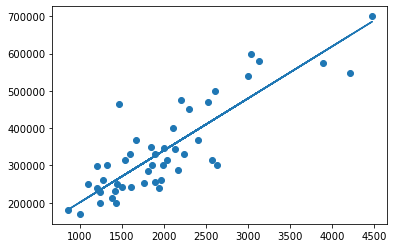

In [15]:
y_hat_line = [predict_line(min_theta[0],min_theta[1],x_i) for x_i in X11[1]]
# y_hat_line = [predict(x_i, min_theta) for x_i in X11[1]]
y_hat_line
plt.scatter(X_1,Y)
plt.plot(X_1,y_hat_line)

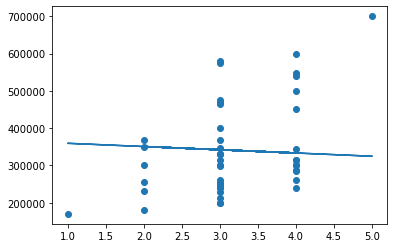

In [16]:
y_hat_line = [predict_line(min_theta[0],min_theta[2],x_i) for x_i in X11[2]]
# y_hat_line = [predict(x_i, min_theta) for x_i in X11[1]]
y_hat_line
plt.scatter(X_2,Y)
plt.plot(X_2,y_hat_line)

In [17]:
# plt.scatter(num_friends_good, daily_minutes_good, marker='.', color='blue', label='ys1')
# plt.plot(num_friends_good, y_hat, '-')
# plt.xlabel('friends')
# plt.ylabel('minutes')
# plt.show()

In [18]:
# alpha = min_theta[0]
# beta = min_theta[1]
# y_hat_1 = [predict_line(alpha, beta, x_i) for x_i in X_1]
# y_hat_alt = []
# for i in range(len(y_hat_1)):
#     y_hat_alt.append(y_hat_1[i][0])
# y_hat_alt   

In [19]:
# plt.scatter(X_1, Y, marker='.', color='blue', label='ys1')
# plt.plot(X_1, np.abs(yy2), '-')
# # plt.xlabel('friends')
# # plt.ylabel('minutes')
# plt.show()

In [20]:
# y_hat_2 = y_hat.to_list()
# type(y_hat)
y_hat_2 = np.array(y_hat)
y_hat_sort = np.sort(y_hat_2)
yy_hat = np.sort(y_hat_sort.reshape(len(y_hat_2),1))
yy_hat = np.sort(yy_hat.T)
# y_hat_sort = y_hat.sort()
# print(y_hat_sort)
# print(np.squeeze(y_hat_sort))
# print(y_hat_sort)
# plt.plot(X_2,np.squeeze(yy_hat))
# yy_hat[::-1]
# plt.plot(X_2,yy_hat[0])
yy_hat

array([[190713.44201047, 216551.56835754, 219986.79710679,
        230468.60912607, 230886.12034912, 235478.74380274,
        235896.25502579, 239932.19684867, 255519.28250942,
        255845.19280719, 262060.29167063, 263451.99574748,
        266374.57430888, 269205.55194498, 271384.70898555,
        276951.52529296, 286136.77220019, 286693.45383093,
        303719.81305094, 306825.5934629 , 309378.23028363,
        312531.580178  , 324778.5760543 , 326496.19042893,
        327840.32502338, 328074.63439587, 331041.24440014,
        334893.98437245, 338695.61682283, 341804.93527431,
        351499.29432988, 355674.40656044, 356278.65767358,
        369639.01681137, 374879.92282101, 374927.49230341,
        397473.09834843, 412038.42167299, 415008.56971678,
        417883.57879577, 430456.48496985, 472299.20820073,
        476613.49083897, 500041.6888125 , 604837.00579954,
        641391.25353837, 669316.93600072]])

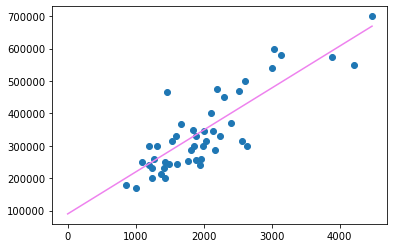

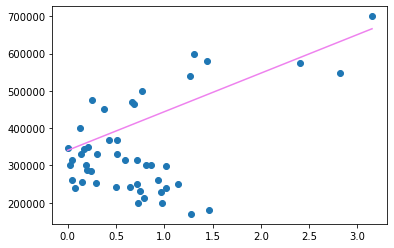

In [21]:
# Matrix Size: Degree of Polynomial
poly_deg = 1
mat_size = poly_deg + 1

# Create dummy matrix
a = np.ones((mat_size,mat_size))
b = np.ones((mat_size,1))

# # Least Squares Method
# b_0 = np.matmul(X1.T, X1)
# # b_0 = x3.T * x3
# b_1 = np.linalg.pinv(b_0)
# Y_0 = np.matrix(Y)
# b_2 = np.dot(Y.T, YX1.T)
# b_hat = np.dot(b_1,b_2)
# print("b_hat:", b_hat)

b_hat = Theta

# X_11 = (X_1 - np.mean(X_1,axis=0))/(np.std(X_1,axis=0))
# X_22 = (X_2 - np.mean(X_2,axis=0))/(np.std(X_2,axis=0))
# X_11 = np.abs(X_11)
# X_22 = np.abs(X_22)

# Y_1 = (Y - np.mean(Y,axis=0))/(np.std(Y,axis=0))

xx0 = np.linspace(0, max(X_1), len(X_1))
xx1 = np.linspace(0, max(X_2), len(X_2))
yy0 = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx0)
yy1 = np.array(b_hat[0] + b_hat[1] * xx1 + b_hat[2]*xx1)
zz = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx1)

plot1 = plt.figure(1)
plt.scatter(X_1,Y)
# plt.scatter(X_2, Y)
# plt.plot(xx1,zz.T, color = 'orange')
plt.plot(xx0,zz.T, color = 'violet')

b_hat = min_theta

X_11 = (X_1 - np.mean(X_1,axis=0))/(np.std(X_1,axis=0))
X_22 = (X_2 - np.mean(X_2,axis=0))/(np.std(X_2,axis=0))
X_11 = np.abs(X_11)
X_22 = np.abs(X_22)


xx0 = np.linspace(0, max(X_11), len(X_11))
xx1 = np.linspace(0, max(X_22), len(X_22))
yy0 = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx0)
yy1 = np.array(b_hat[0] + b_hat[1] * xx1 + b_hat[2]*xx1)
zz = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx1)

plot2 = plt.figure(2)
plt.scatter(X_11,Y)
# plt.scatter(X_2, Y)
# plt.plot(xx1,zz.T, color = 'orange')
plt.plot(xx0,zz.T, color = 'violet')

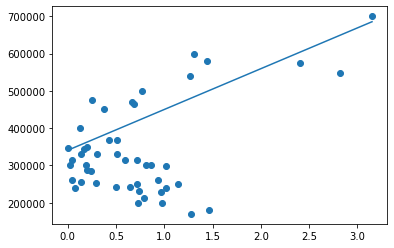

In [22]:
## Plotting the best fit line
min_theta = b_hat
best_fit_x = np.linspace(np.min(X_11), np.max(X_11), len(X_11))
best_fit_y = [min_theta[0] + min_theta[1]*xx for xx in best_fit_x]
plt.scatter(X_11,Y)
plt.plot(best_fit_x,best_fit_y)

In [23]:
# plt.scatter(X_22, Y, marker='.', color='blue', label='ys1')
# plt.plot(X_22,np.squeeze(yy_hat), '-')
# plt.xlabel('friends')
# plt.ylabel('minutes')
# plt.show()

In [24]:
# xx0 = np.linspace(0, max(X_1), len(X_1))
# xx1 = np.linspace(0, max(X_2), len(X_2))
# # yy0 = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx0)
# # yy1 = np.array(b_hat[0] + b_hat[1] * xx1 + b_hat[2]*xx1)
# zz = np.array(min_theta[0] + min_theta[1] * xx1)

In [25]:
# plot1 = plt.figure(1)
# plt.scatter(X_2, Y, marker='.', color='blue', label='ys1')
# plt.plot(xx1,zz.T)
# # plt.plot(x_list, J_tot)
# # plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
# plt.grid()

In [26]:
b_hat = np.array(min_theta)
# b_hat = b_hat[::-1]

# X_11 = (X_1 - np.min(X_1))/(np.max(X_1) - np.min(X_1))
# X_22 = (X_2 - np.min(X_2))/(np.max(X_2) - np.min(X_2))

X_11 = (X_1 - np.mean(X_1,axis=0))/(np.std(X_1,axis=0))
X_22 = (X_2 - np.mean(X_2,axis=0))/(np.std(X_2,axis=0))
X_11 = np.abs(X_11)
X_22 = np.abs(X_22)

# Y = (Y - np.min(Y))/(np.max(Y) - np.min(Y))
# Y = (Y -np.mean(Y,axis=0))/np.std(Y,axis=0)

# X_1a = (X_1 - np.mean(X_1))/(np.std(X_1))

xx0 = np.linspace(0, max(X_11), len(X_11))
xx1 = np.linspace(0, max(X_22), len(X_22))
# yy0 = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx0)
# yy1 = np.array(b_hat[0] + b_hat[1] * xx1 + b_hat[2]*xx1)
zz = np.array(b_hat[0] + b_hat[1] * xx0 + b_hat[2]*xx1)

# print(yy0.shape)

xx0_list = np.array([1,xx0,xx0])
xx0_list_1 = xx0_list.reshape(len(b_hat),1)
yy0_1 = np.dot(b_hat.T,xx0_list_1)
yy0_2 = yy0_1.tolist()
yy0_2 = np.squeeze(yy0_2)

xx0_list = np.array([1,xx1,xx1])
xx0_list_2 = xx0_list.reshape(len(b_hat),1)
yy0_1 = np.dot(b_hat.T,xx0_list_2)
yy0_3 = yy0_1.tolist()
yy0_3 = np.squeeze(yy0_3)

xx = np.array([1,xx0,xx1]).reshape(len(b_hat),1)
zz1 = b_hat.T.dot(xx)
zz2 = zz1.tolist()
zz2 = np.squeeze(zz2)
zz = np.abs(zz2)

C:\Users\USER\AppData\Local\Temp/ipykernel_10164/695234767.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xx0_list = np.array([1,xx0,xx0])
C:\Users\USER\AppData\Local\Temp/ipykernel_10164/695234767.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xx0_list = np.array([1,xx1,xx1])
C:\Users\USER\AppData\Local\Temp/ipykernel_10164/695234767.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [27]:
## Plotting the best fit line
# best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [min_theta[0] + min_theta[1]*xx2 + min_theta[2]*xx1 for xx1,xx2 in zip(xx0,xx1)]

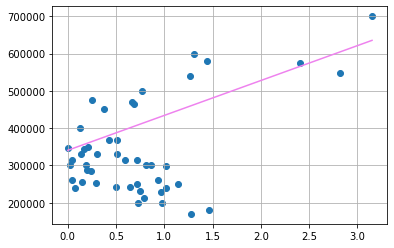

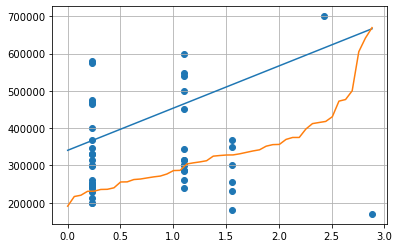

In [28]:
# # Plots

# Actual & Predicted values
plot1 = plt.figure(1)
plt.scatter(X_11,Y)
# plt.scatter(X_2,Y)
# plt.plot(xx1,zz2, color = 'orange')
plt.plot(xx0,best_fit_y, color = 'violet')
# plt.scatter(xx0, yy_hat[0])
plt.plot()
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

plot2 = plt.figure(2)
plt.scatter(X_22, Y)
plt.plot(xx1,zz)
plt.plot(xx1, yy_hat[0])
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

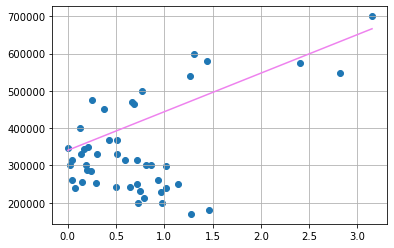

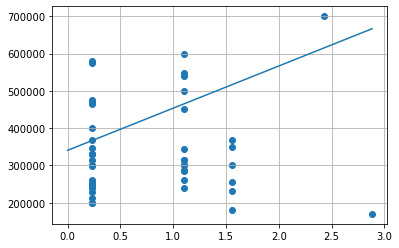

In [29]:
# # Plots

# Actual & Predicted values
plot1 = plt.figure(1)
plt.scatter(np.abs(X_11),Y)
# plt.scatter(X_2,Y)
# plt.plot(xx1,zz2, color = 'orange')
plt.plot(np.abs(xx0),np.abs(zz), color = 'violet')
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

plot2 = plt.figure(2)
plt.scatter(np.abs(X_22), Y)
plt.plot(np.abs(xx1),zz)
# plt.plot(x_list, J_tot)
# plt.plot(x_list, J_tot_smooth)
# plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()